In [1120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier
import scikitplot as skplt
#from sklearn.metrics import roc_auc_score

In [1121]:
pd.set_option('display.max_rows', 100)

In [1122]:
#import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)

In [1123]:
df = pd.read_csv('final_data.csv')

In [1124]:
df

age  gender  who  fev1pc0  cci  losswght  stage  hist  tumorload  \
0    69.792725       1    0     67.0    1         2      3     3  36.110000   
1    79.618394       1    1     35.0    2         2      1     1  13.960000   
2    77.501716       1    2     42.0    4         0      1     9  61.740000   
3    87.505834       2    2     47.0    2         1      2     1  78.050000   
4    75.137955       1    0     27.0    2         2      1     1  42.390000   
..         ...     ...  ...      ...  ...       ...    ...   ...        ...   
317  79.426218       1    1     65.0    2         2      1     4  15.610000   
318  76.175704       1    2     80.0    2         0      3     4  92.179996   
319  79.881949       1    2     53.0    3         2      1     4  22.959999   
320  63.623885       1    1     56.0    2         2      1     1   1.060000   
321  70.410432       1    1     48.0    2         0      3     4   5.510000   

     countpet  chemo  ott  eqd2t  surv2y  
0           1      1   41  51.42       0  
1           0      0   46  58.12       0  
2           0      0   46  58.12       0  
3           0      0   36  64.72       1  
4           0      0   49  56.14       0  
..        ...    ...  ...    ...     ...  
317         0      0   30  76.56       1  
318         4      1   18  53.10       1  
319         0      0   27  60.18       0  
320         0      0   33  74.58       1  
321         1      1   23  60.18       1  

[322 rows x 14 columns]

In [1125]:
#confirming shape
df.shape

(322, 14)

In [1126]:
df[df.surv2y == 0] 

age  gender  who  fev1pc0  cci  losswght  stage  hist  tumorload  \
0    69.792725       1    0     67.0    1         2      3     3  36.110000   
1    79.618394       1    1     35.0    2         2      1     1  13.960000   
2    77.501716       1    2     42.0    4         0      1     9  61.740000   
4    75.137955       1    0     27.0    2         2      1     1  42.390000   
5    73.575841       2    2    101.0    2         0      4     1  90.290000   
..         ...     ...  ...      ...  ...       ...    ...   ...        ...   
312  52.856555       2    1     79.0    1         1      4     4  16.300000   
314  80.971860       2    1     50.0    2         2      4     4  18.850000   
315  78.995196       1    1    108.0    3         0      2     1  23.190001   
316  66.890872       1    3     97.0    3         1      4     2  77.910000   
319  79.881949       1    2     53.0    3         2      1     4  22.959999   

     countpet  chemo  ott  eqd2t  surv2y  
0           1      1   41  51.42       0  
1           0      0   46  58.12       0  
2           0      0   46  58.12       0  
4           0      0   49  56.14       0  
5           4      1   42  50.76       0  
..        ...    ...  ...    ...     ...  
312         2      1   30  76.56       0  
314         0      0   50  49.20       0  
315         1      0   30  76.56       0  
316         4      1   30  76.56       0  
319         0      0   27  60.18       0  

[219 rows x 14 columns]

In [1127]:
#df = df.drop(columns="unnamed")
df.columns

Index(['age', 'gender', 'who', 'fev1pc0', 'cci', 'losswght', 'stage', 'hist',
       'tumorload', 'countpet', 'chemo', 'ott', 'eqd2t', 'surv2y'],
      dtype='object')

In [1128]:
#################### data preprocessing
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [1129]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [1130]:
np.unique(y_train,return_counts = True)

(array([0, 1], dtype=int64), array([176,  81], dtype=int64))

In [1131]:
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1132]:
#classifier
#classifier = RandomForestClassifier(n_estimators = 18, class_weight='balanced_subsample', random_state= 2) #max_depth = 1000, random_state = 2, criterion ='gini', class_weight='balanced') #min_impurity_split=50)
#classifier.fit(X_train, y_train)
classifier = BalancedRandomForestClassifier(n_estimators=19, random_state = 2, class_weight='balanced')

In [1133]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)

In [1134]:
# Run cross validation
cv_results = cross_val_score(classifier, X, y, cv=cv, scoring='roc_auc', n_jobs = 1)

In [1135]:
print(cv_results)
print(np.mean(cv_results))

[0.51239669 0.5661157  0.82727273 0.69318182 0.75227273 0.725
 0.71818182 0.58636364 0.68863636 0.71212121 0.66322314 0.64256198
 0.90909091 0.58863636 0.65681818 0.76590909 0.72272727 0.68636364
 0.49545455 0.38744589 0.83677686 0.7107438  0.79772727 0.66590909
 0.66136364 0.71818182 0.71363636 0.75909091 0.54545455 0.81818182
 0.7107438  0.71487603 0.65227273 0.85227273 0.38636364 0.65454545
 0.81136364 0.67272727 0.79090909 0.69264069 0.65289256 0.6322314
 0.57954545 0.57727273 0.90227273 0.59090909 0.69318182 0.55681818
 0.59772727 0.80519481 0.74586777 0.76652893 0.71363636 0.65227273
 0.60681818 0.72045455 0.83181818 0.49090909 0.62272727 0.76623377
 0.66735537 0.67768595 0.62272727 0.75454545 0.74545455 0.79545455
 0.64772727 0.57727273 0.68636364 0.7012987  0.4607438  0.77066116
 0.61363636 0.69090909 0.59090909 0.84772727 0.77954545 0.82045455
 0.80454545 0.58441558 0.66528926 0.71694215 0.77954545 0.68636364
 0.61363636 0.60909091 0.68181818 0.57045455 0.6        0.8030303
 0

In [1136]:
classifier.fit(X_train, y_train)

BalancedRandomForestClassifier(class_weight='balanced', n_estimators=19,
                               random_state=2)

In [1137]:
#class_weight='balanced'

In [1138]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [1139]:
cm_test = confusion_matrix(y_pred, y_test)

In [1164]:
cm_test

array([[32,  7],
       [11, 15]], dtype=int64)

In [1140]:
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

In [1141]:
cm_train

array([[157,   1],
       [ 19,  80]], dtype=int64)

In [1142]:
#print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training set for Random Forest = 0.9221789883268483
Accuracy for test set for Random Forest = 0.7230769230769231


In [1143]:
precision = precision_score(y_pred, y_test, pos_label = 0, average= 'binary')
print ('Precision for testing set label 0:', precision)

Precision for testing set label 0: 0.7441860465116279


In [1144]:
#y_test.shape

In [1145]:
#y_pred.shape

In [1146]:
#precision_1 = precision_score(y_pred, y_test, average = 'micro')
#precision_1

In [1147]:
#precision_2 = precision_score(y_pred, y_test, average = 'macro')
#precision_2

In [1148]:
precision_3 = precision_score(y_pred, y_test, pos_label = 1,average = "binary")
print ('Precision for testing set label 1:', precision)

Precision for testing set label 1: 0.7441860465116279


In [1149]:
recall  = recall_score(y_pred, y_test, pos_label = 1, average = "binary")
recall

0.5769230769230769

In [1150]:
recall_1  = recall_score(y_pred, y_test, pos_label = 0, average = "binary")
recall_1

0.8205128205128205

In [1158]:
# make predictions on the entire dataset
#for i in range(10):
    #print(X[i], y_pred[i])

In [1152]:
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=0)
#metrics.auc(fpr, tpr)

In [1153]:
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
#metrics.auc(fpr, tpr)

In [1154]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

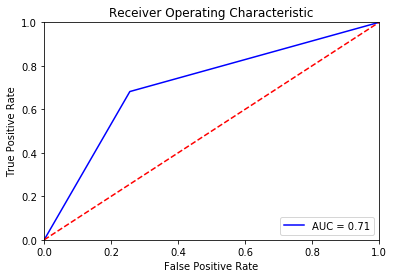

In [1155]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1156]:
sc = ss()
X_new = sc.fit_transform(X)
X_new = sc.transform(X)


In [1157]:
# Predicting the Test set results
y_new = classifier.predict(X)
y_new

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [1160]:
df['surv2y_pred'] = y_new
#df.to_csv('final_data.csv', index=False

In [1162]:
df.surv2y_pred.shape

(322,)

In [1163]:
df.to_csv('final_data.csv', index=False)

# Visualizations

## who

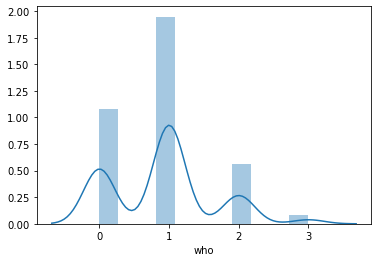

In [317]:
sns.distplot(df.who)

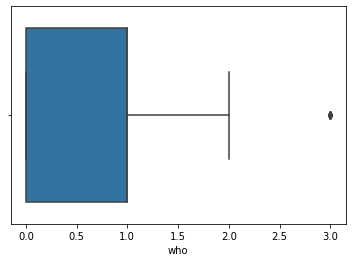

In [320]:
sns.boxplot(df.who)

## fev1pc0

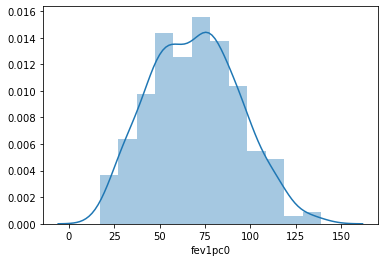

In [319]:
sns.distplot(df.fev1pc0)

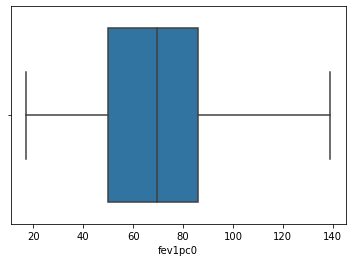

In [321]:
sns.boxplot(df.fev1pc0)

## cci

In [323]:
sns.boxplot(df.cci)

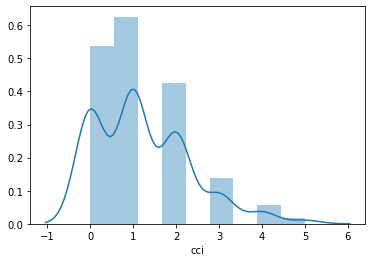

In [332]:
sns.distplot(df.cci)

## losswght

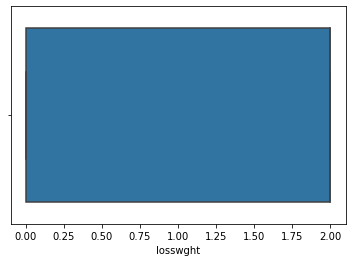

In [324]:
sns.boxplot(df.losswght)

In [325]:
sns.distplot(df.losswght)

## stage

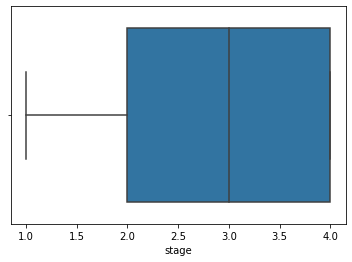

In [326]:
sns.boxplot(df.stage)

In [327]:
sns.distplot(df.stage)

## tumorload

In [328]:
sns.boxplot(df.tumorload)

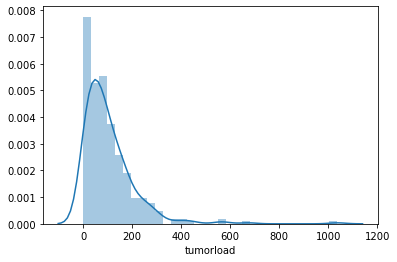

In [329]:
sns.distplot(df.tumorload)

## countpet

In [330]:
sns.boxplot(df.countpet)

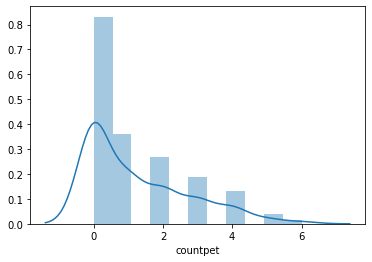

In [331]:
sns.distplot(df.countpet)